# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
df=pd.read_csv("daily_final(probably).csv")
df

,date,deliverybdays,deliverycdays,sla,product_procurement_sla,sale,NPS,Stock Index,holidays,Total Investment,...,CameraAccessory_units,EntertainmentSmall_units,GameCDDVD_units,GamingHardware_units,total_units,Camera_discount,CameraAccessory_discount,EntertainmentSmall_discount,GameCDDVD_discount,GamingHardware_discount
0,2023-07-01,0.107143,0.107143,3.964286,3.214286,0,54.6,1177.0,1,0.020588,...,1.0,25.0,2.0,3.0,31.0,0.000000,25.250000,34.352774,61.453380,59.029283
1,2023-07-03,0.788136,0.800847,2.313559,2.775424,0,54.6,1177.0,0,12.040132,...,32.0,159.0,21.0,29.0,249.0,22.156618,39.665559,-334.159376,8.405819,1.042556
2,2023-07-04,0.057143,0.085714,4.400000,2.971429,0,54.6,1177.0,0,0.262768,...,1.0,27.0,1.0,7.0,37.0,14.423741,25.778547,17.425548,34.044682,30.818306
3,2023-07-05,0.000000,0.000000,8.000000,1.000000,0,54.6,1177.0,0,0.000150,...,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,36.678893,0.000000,0.000000
4,2023-07-06,0.000000,0.000000,5.909091,3.181818,0,54.6,1177.0,0,0.139804,...,0.0,7.0,0.0,4.0,12.0,21.387500,0.000000,35.283064,0.000000,-67.665986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2024-06-26,3.535771,3.698345,5.678324,10.459690,0,50.5,1194.0,0,175.406694,...,580.0,1987.0,297.0,529.0,3732.0,-15.115185,23.591906,38.120957,-243.039879,31.680499
371,2024-06-27,3.474777,3.498813,4.627003,10.827300,0,50.5,1194.0,0,157.655875,...,519.0,1802.0,302.0,525.0,3327.0,21.206733,39.312325,37.194010,36.445804,8.548119
372,2024-06-28,3.328229,3.583068,4.592892,14.068766,0,50.5,1194.0,0,164.149592,...,15.0,73.0,9.0,13.0,118.0,19.840546,25.760110,-55.962731,36.190233,29.352222
373,2024-06-29,3.155966,3.686966,4.511436,9.607605,0,50.5,1194.0,0,220.816666,...,16.0,59.0,14.0,14.0,113.0,-2.837025,38.118933,12.176298,34.698822,23.995253


In [ ]:
df.columns

Index(['date', 'deliverybdays', 'deliverycdays', 'sla',
       'product_procurement_sla', 'sale', 'NPS', 'Stock Index', 'holidays',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'tavg',
       'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'Camera_gmv',
       'CameraAccessory_gmv', 'EntertainmentSmall_gmv', 'GameCDDVD_gmv',
       'GamingHardware_gmv', 'Total_GMV', 'Camera_units',
       'CameraAccessory_units', 'EntertainmentSmall_units', 'GameCDDVD_units',
       'GamingHardware_units', 'total_units', 'Camera_discount',
       'CameraAccessory_discount', 'EntertainmentSmall_discount',
       'GameCDDVD_discount', 'GamingHardware_discount'],
      dtype='object')

## **Defining Key Risk Indicators**

## SLA Compliance (%)

The process starts by calculating the SLA compliance percentage for each entry in the DataFrame. The data is then grouped by month, and the average values for SLA compliance and NPS are computed. A correlation matrix between these two metrics is calculated, and a heatmap is generated to visualize the correlation, using a custom blue color palette. The heatmap is annotated with correlation values and displayed with the title "Correlation Matrix for SLA Compliance and NPS (Monthly)."

<ipython-input-44-ca8c4b64a1c1>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.groupby(pd.Grouper(key='date', freq='M'))[['SLA Compliance (%)', 'NPS']].mean()


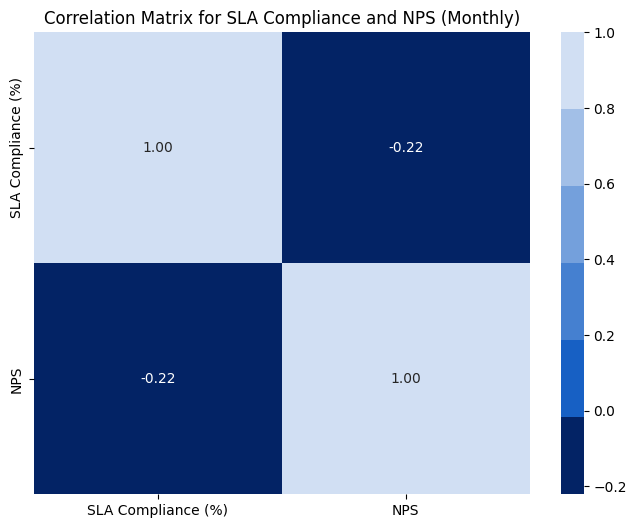

In [ ]:
df['SLA Compliance (%)'] = (df['sla'] / (df['deliverybdays'] + df['deliverycdays'])) * 100
custom_palette = ['#032365', '#1760C4', '#4580d0', '#74a0dc', '#a2bfe7', '#d1dff3']

df['date'] = pd.to_datetime(df['date'])
monthly_data = df.groupby(pd.Grouper(key='date', freq='M'))[['SLA Compliance (%)', 'NPS']].mean()

correlation_matrix = monthly_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(custom_palette, as_cmap=True), fmt=".2f")
plt.title('Correlation Matrix for SLA Compliance and NPS (Monthly)')
plt.show()


<h1><b>NPS Volatility

The **NPS Volatility Index** is calculated by applying a rolling window of 90 days to the Net Promoter Score (NPS) data. This process computes the standard deviation of NPS scores within each 90-day window, providing a measure of variability or volatility in customer satisfaction over time. The resulting **NPS Volatility Index** is added as a new column to the dataset, allowing for the analysis of fluctuations in customer feedback. This index helps identify periods of instability or significant changes in customer satisfaction, offering valuable insights into customer sentiment trends.

In [ ]:
def calculate_nps_volatility(df):
  """Calculates the NPS Volatility Index.

  Args:
    df: A Pandas DataFrame containing 'NPS' and 'date' columns.

  Returns:
    A Pandas DataFrame with the 'NPS Volatility Index' added.
  """
  df['NPS Volatility Index'] = df['NPS'].rolling(window=90).std()
  return df

df = calculate_nps_volatility(df)

The analysis involves examining the relationship between the **NPS Volatility Index** and **Total GMV** over time. First, the NPS Volatility Index and Total GMV are plotted together to visually assess their trends. The correlation between these two variables is calculated, providing an initial understanding of their relationship. Next, a rolling correlation is computed over a 12-period window to track how the correlation between the NPS Volatility Index and Total GMV evolves. This is followed by a scatter plot with a regression line to explore the linear relationship between the two metrics. To ensure data quality, infinite values are replaced with NaN, and rows containing NaN values are dropped before performing a **Granger Causality Test** to assess any potential causal relationship between Total GMV and the NPS Volatility Index, with a maximum lag of 4. This comprehensive analysis helps determine if fluctuations in customer satisfaction, as measured by NPS volatility, have any predictive or causal impact on total sales or GMV.

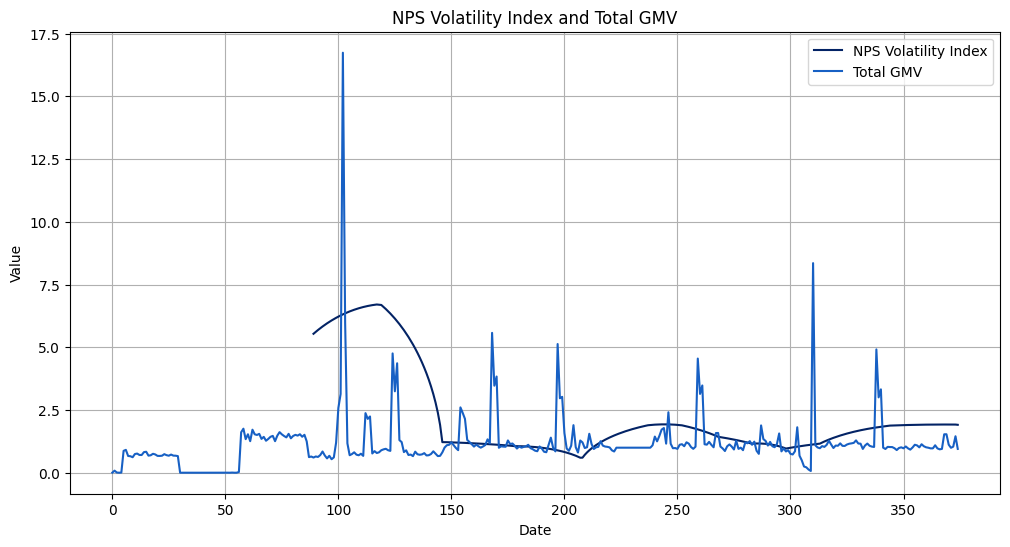

Correlation between NPS Volatility Index and Total GMV: 0.10200953900461654


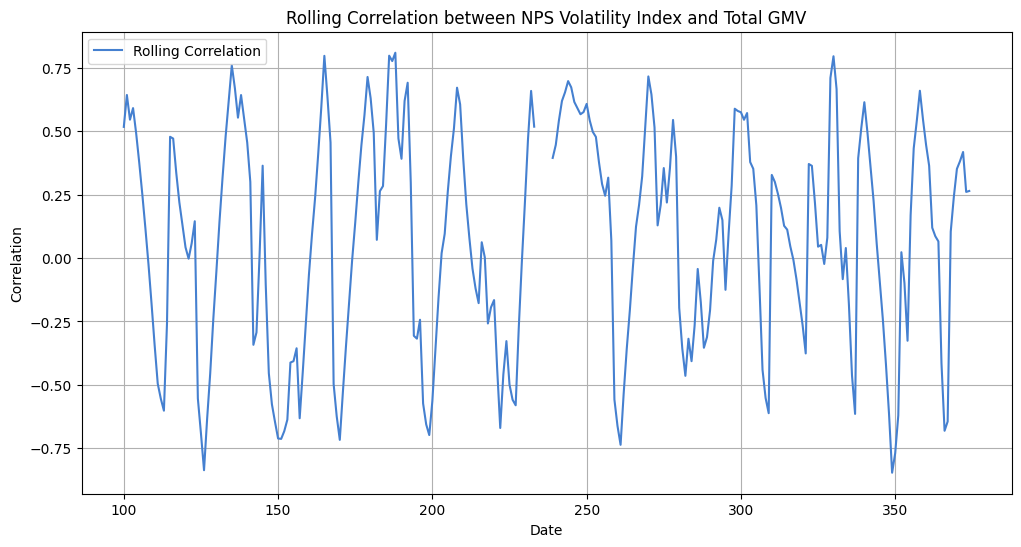

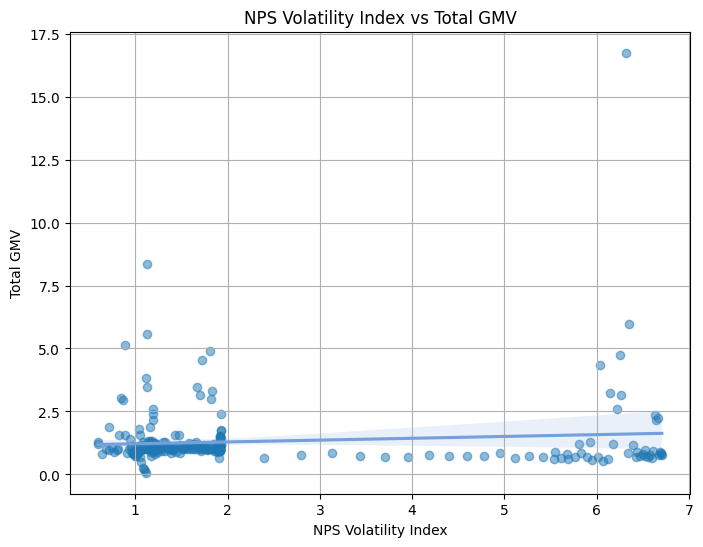


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4246  , p=0.2337  , df_denom=282, df_num=1
ssr based chi2 test:   chi2=1.4397  , p=0.2302  , df=1
likelihood ratio test: chi2=1.4361  , p=0.2308  , df=1
parameter F test:         F=1.4246  , p=0.2337  , df_denom=282, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1650  , p=0.3134  , df_denom=279, df_num=2
ssr based chi2 test:   chi2=2.3717  , p=0.3055  , df=2
likelihood ratio test: chi2=2.3619  , p=0.3070  , df=2
parameter F test:         F=1.1650  , p=0.3134  , df_denom=279, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0455  , p=0.3728  , df_denom=276, df_num=3
ssr based chi2 test:   chi2=3.2162  , p=0.3595  , df=3
likelihood ratio test: chi2=3.1980  , p=0.3621  , df=3
parameter F test:         F=1.0455  , p=0.3728  , df_denom=276, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9067  , p=0.4604  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
custom_palette = ['#032365', '#1760C4', '#4580d0', '#74a0dc', '#a2bfe7', '#d1dff3']

# Plotting NPS Volatility Index and Total GMV
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['NPS Volatility Index'], label='NPS Volatility Index', color='#032365')
plt.plot(df.index, df['Total_GMV'], label='Total GMV', color='#1760C4')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('NPS Volatility Index and Total GMV')
plt.legend()
plt.grid(True)
plt.show()

# Correlation between NPS Volatility Index and Total GMV
correlation = df['NPS Volatility Index'].corr(df['Total_GMV'])
print(f"Correlation between NPS Volatility Index and Total GMV: {correlation}")

# Rolling Correlation Plot
rolling_window = 12  # Define rolling window size
df['Rolling Correlation'] = df['NPS Volatility Index'].rolling(window=rolling_window).corr(df['Total_GMV'])

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rolling Correlation'], label='Rolling Correlation', color='#4580d0')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.title('Rolling Correlation between NPS Volatility Index and Total GMV')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x=df['NPS Volatility Index'], y=df['Total_GMV'], scatter_kws={'alpha':0.5}, line_kws={'color': '#74a0dc'})
plt.xlabel('NPS Volatility Index')
plt.ylabel('Total GMV')
plt.title('NPS Volatility Index vs Total GMV')
plt.grid(True)
plt.show()

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the relevant columns
df.dropna(subset=['Total_GMV', 'NPS Volatility Index'], inplace=True)

# Running the Granger causality test again
max_lag = 4  # Define maximum lag to test
granger_test = grangercausalitytests(df[['Total_GMV', 'NPS Volatility Index']], max_lag, verbose=True)

Insights from Granger Causality Test
The Granger Causality test results indicate whether past values of one time series can predict future values of another time series. Here are the insights based on the provided results:

Number of Lags: The test was performed with different lag lengths (1, 2, 3, and 4).
Test Statistics:
ssr based F test: This is the F-statistic based on the sum of squared residuals.
ssr based chi2 test: This is the chi-square statistic based on the sum of squared residuals.
likelihood ratio test: This is the chi-square statistic based on the likelihood ratio.
parameter F test: This is another F-statistic.
P-values: The p-values for all the tests are above 0.05, indicating that there is no significant causality at conventional levels of significance (5%).
Detailed Insights:
Lag 1:

The p-values for all tests (ssr based F test, ssr based chi2 test, likelihood ratio test, and parameter F test) are around 0.23.
This indicates that at a 1-lag interval, the past values of one time series do not significantly predict the future values of the other time series.
Lag 2:

The p-values for all tests are around 0.31.
This suggests that with a 2-lag interval, there is still no significant predictive relationship between the time series.
Lag 3:

The p-values for all tests are around 0.36.
With a 3-lag interval, there is no significant causality found between the time series.
Lag 4:

The p-values for all tests are around 0.44.
Even with a 4-lag interval, there is no significant predictive relationship between the time series.
Conclusion:
No Significant Causality: The results suggest that the past values of the NPS Volatility Index do not significantly predict the future values of GMV, and vice versa, at the tested lag intervals.
Potential for Further Analysis: While the Granger Causality test did not indicate a significant predictive relationship, it might be useful to explore other statistical or machine learning methods to uncover any potential non-linear relationships or interactions between the variables.

In [ ]:
# Slope of (Total_GMV / Total Investment) over time
# Negative slopes indicate declining marketing ROI.

def calculate_marketing_efficiency_deterioration(df):
  """Calculates the marketing efficiency deterioration over time.

  Args:
    df: A Pandas DataFrame with 'date', 'Total_GMV', and 'Total Investment' columns.

  Returns:
    A Pandas DataFrame with a new column 'Marketing Efficiency Deterioration'.
  """

  # Calculate marketing ROI (Total_GMV / Total Investment)
  df['Marketing ROI'] = df['Total_GMV'] / df['Total Investment']

  # Calculate the slope of the marketing ROI over time using linear regression
  window_size = 30
  df['Marketing Efficiency Deterioration'] = df['Marketing ROI'].rolling(window=window_size).apply(lambda x: np.polyfit(range(len(x)), x, 1)[0] if len(x) == window_size else np.nan)

  # Negative slopes indicate declining marketing ROI
  return df


df = calculate_marketing_efficiency_deterioration(df)

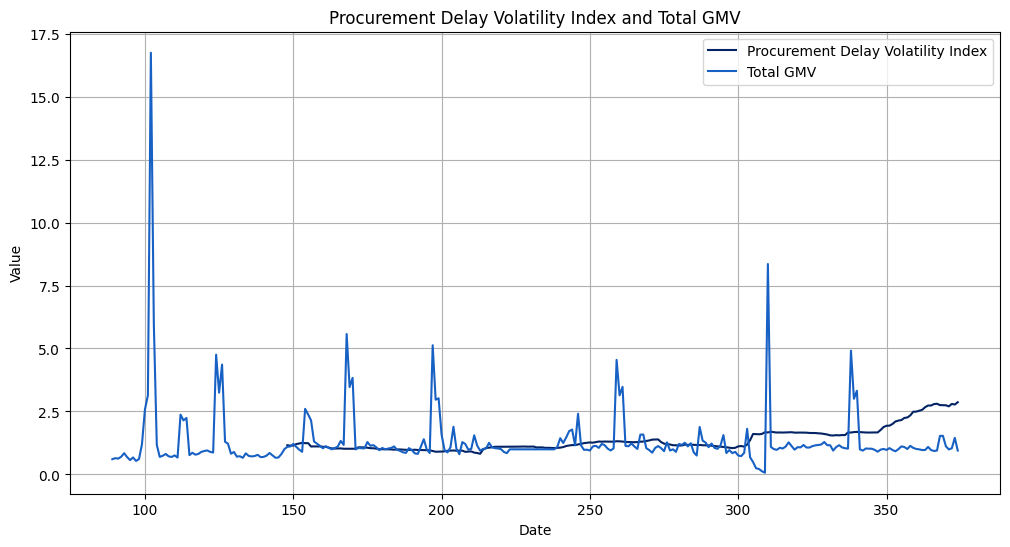

Correlation between Procurement Delay Volatility Index and Total GMV: -0.053914509772303


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def calculate_procurement_delay_volatility(df):
    """Calculates the Procurement Delay Volatility Index.

    Args:
        df: A Pandas DataFrame containing 'product_procurement_sla' and 'date' columns.

    Returns:
        A Pandas DataFrame with the 'Procurement Delay Volatility Index' added.
    """
    df['Procurement Delay Volatility Index'] = df['product_procurement_sla'].rolling(window=60).std()
    return df

df = calculate_procurement_delay_volatility(df)

custom_palette = ['#032365', '#1760C4', '#4580d0', '#74a0dc', '#a2bfe7', '#d1dff3']

plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Procurement Delay Volatility Index'], label='Procurement Delay Volatility Index', color='#032365')

plt.plot(df.index, df['Total_GMV'], label='Total GMV', color='#1760C4')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Procurement Delay Volatility Index and Total GMV')

plt.legend()
plt.grid(True)

plt.show()

correlation = df['Procurement Delay Volatility Index'].corr(df['Total_GMV'])
print(f"Correlation between Procurement Delay Volatility Index and Total GMV: {correlation}")

## Channel Dependency Risk

The analysis focuses on evaluating the dependency risk associated with different marketing channels and its impact on the **Gross Merchandise Value (GMV)**. The process begins by calculating the dependency risk for each channel, which is derived by dividing each channel's investment by the total marketing investment. Additionally, an **Overall Risk Score** is computed using the **Herfindahl-Hirschman Index**, which aggregates the squared risks of all marketing channels. The relationship between channel risks and GMV is examined through **Pearson correlation**, providing insights into the strength and statistical significance of their associations. Visualization includes scatter plots with regression lines to assess the dependency risk's effect on GMV and a time series plot to compare the **Overall Risk Score** with GMV over time. These visualizations and metrics offer valuable insights for optimizing marketing strategies by highlighting which channels contribute most to GMV fluctuations.

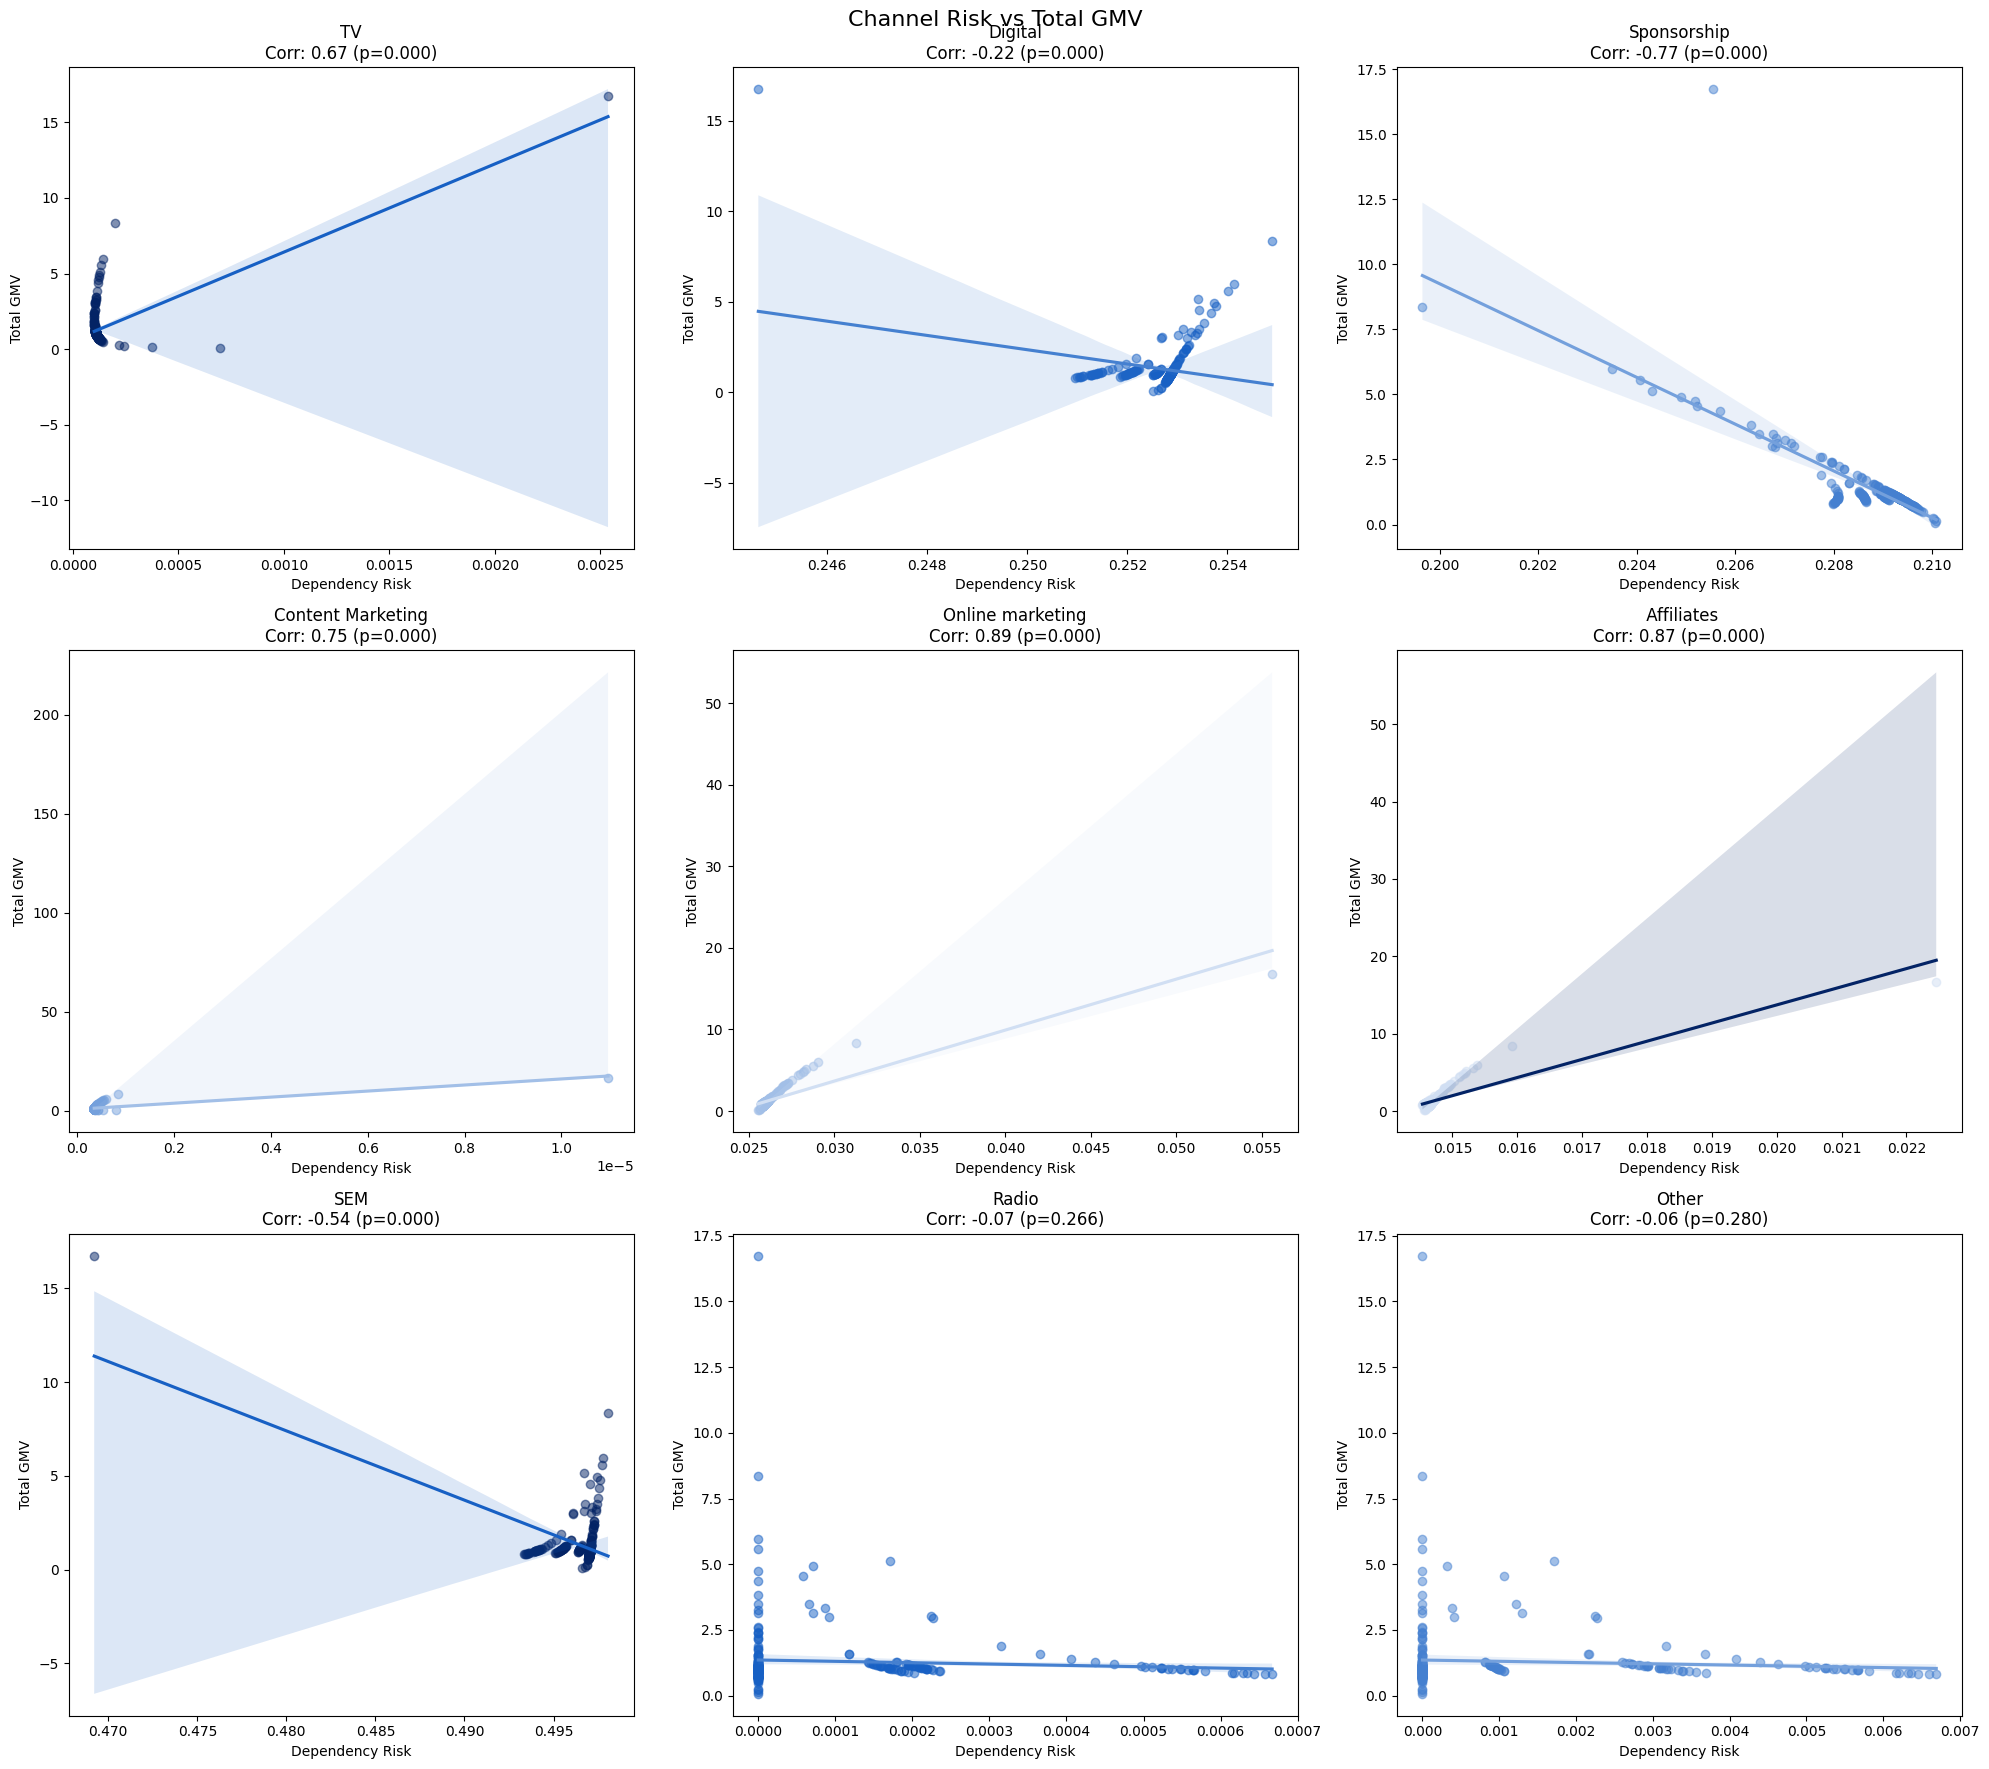

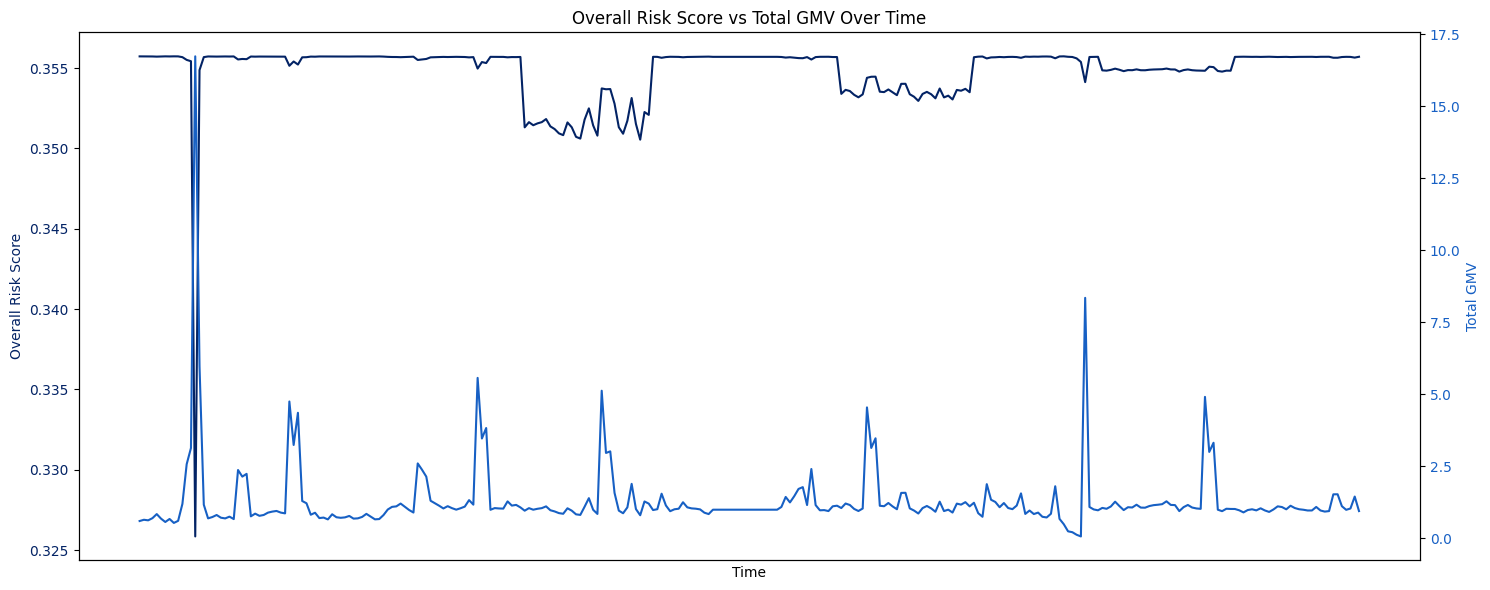

In [ ]:
def calculate_channel_dependency_risk(df):
    """
    Calculates the marketing channel dependency risk and analyzes its relationship with GMV.

    Args:
        df: A Pandas DataFrame with marketing channel investment columns and total_gmv

    Returns:
        A tuple containing:
        - Modified DataFrame with risk metrics
        - Dictionary with correlation results
    """
    marketing_channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing',
                         'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']

    df['Total Investment'] = df[marketing_channels].sum(axis=1)

    # Calculate dependency risk for each channel
    for channel in marketing_channels:
        df[f'{channel} Risk'] = df[channel] / df['Total Investment']

    # Calculate overall dependency risk (Herfindahl-Hirschman Index)
    df['Overall Risk Score'] = sum((df[f'{channel} Risk'] ** 2) for channel in marketing_channels)

    # Analyze correlation with GMV
    correlation_results = {}
    for channel in marketing_channels:
        correlation = stats.pearsonr(df[f'{channel} Risk'], df['Total_GMV'])
        correlation_results[channel] = {
            'correlation': correlation[0],
            'p_value': correlation[1]
        }

    return df, correlation_results

def plot_risk_analysis(df, correlation_results):
    """
    Creates visualizations for channel dependency risk analysis.
    """
    # Custom color palette
    custom_palette = ['#032365', '#1760C4', '#4580d0', '#74a0dc', '#a2bfe7', '#d1dff3']

    # 1. Heatmap of channel risks over time
    # plt.figure(figsize=(15, 8))
    risk_columns = [col for col in df.columns if col.endswith('Risk') and col != 'Overall Risk Score']

    # Convert 'date' column to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)

    # sns.heatmap(df[risk_columns].transpose(), cmap='coolwarm', annot=True)
    # plt.title('Channel Risk Over Time')
    # plt.show()

    # 2. Risk vs GMV Scatter plots with regression lines
    marketing_channels = [col.replace(' Risk', '') for col in risk_columns]

    # Filter marketing_channels to include only those present in correlation_results
    marketing_channels = [channel for channel in marketing_channels if channel in correlation_results]

    num_channels = len(marketing_channels)
    num_cols = min(num_channels, 3)  # Limit columns to 3
    num_rows = (num_channels + num_cols - 1) // num_cols  # Calculate rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))
    fig.suptitle('Channel Risk vs Total GMV', fontsize=16)

    for idx, channel in enumerate(marketing_channels):
        row = idx // num_cols
        col = idx % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]  # Handle single row case

        # Use custom color for scatter and line
        sns.regplot(data=df,
                   x=f'{channel} Risk',
                   y='Total_GMV',
                   ax=ax,
                   scatter_kws={'alpha': 0.5, 'color': custom_palette[idx % len(custom_palette)]},
                   line_kws={'color': custom_palette[(idx + 1) % len(custom_palette)]})

        corr = correlation_results[channel]['correlation']
        p_val = correlation_results[channel]['p_value']

        ax.set_title(f'{channel}\nCorr: {corr:.2f} (p={p_val:.3f})')
        ax.set_xlabel('Dependency Risk')
        ax.set_ylabel('Total GMV')

    plt.tight_layout()
    plt.show()

    # 3. Time series plot of Overall Risk Score and GMV
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # Plot Overall Risk Score with custom color
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Overall Risk Score', color=custom_palette[0])
    ax1.plot(df.index, df['Overall Risk Score'], color=custom_palette[0])
    ax1.tick_params(axis='y', labelcolor=custom_palette[0])

    # Plot GMV on secondary y-axis with custom color
    ax2 = ax1.twinx()
    ax2.set_ylabel('Total GMV', color=custom_palette[1])
    ax2.plot(df.index, df['Total_GMV'], color=custom_palette[1])
    ax2.tick_params(axis='y', labelcolor=custom_palette[1])

    plt.title('Overall Risk Score vs Total GMV Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
df, correlation_results = calculate_channel_dependency_risk(df)
plot_risk_analysis(df, correlation_results)

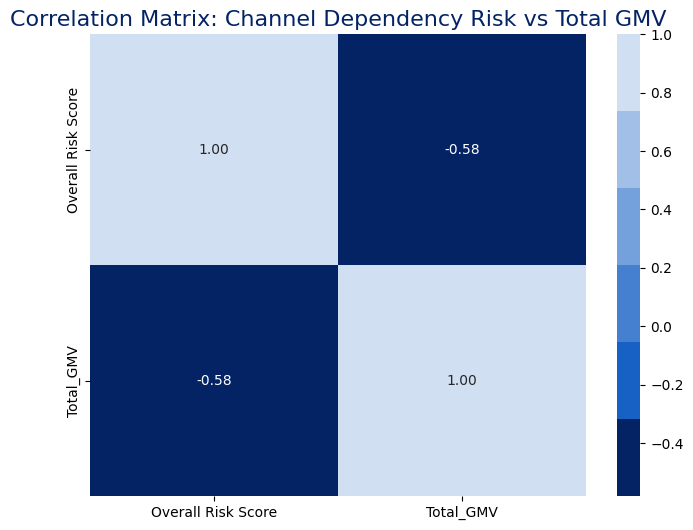

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Overall Risk Score', 'Total_GMV']].corr()

custom_palette = ['#032365', '#1760C4', '#4580d0', '#74a0dc', '#a2bfe7', '#d1dff3']

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(custom_palette, as_cmap=True), fmt=".2f")

plt.title('Correlation Matrix: Channel Dependency Risk vs Total GMV', fontsize=16, color=custom_palette[0])

plt.show()

## Product Concentration Risk

The analysis investigates the concentration risk across various product categories and its correlation with **Total GMV**. First, the concentration risk for each product category is calculated by dividing the GMV of each category by the total GMV. An **Overall Concentration Risk Score** is then computed using the **Herfindahl-Hirschman Index**, which aggregates the squared concentration risks of all product categories. Pearson correlation is used to assess the relationship between the concentration risk of each product category and GMV. Visualizations include scatter plots with regression lines to highlight the concentration risk's effect on GMV, along with a time series plot comparing the **Overall Concentration Risk Score** and GMV over time. These visualizations provide valuable insights into the risk posed by product concentration and how it correlates with the overall GMV, aiding in more informed decision-making for optimizing product portfolio strategies.

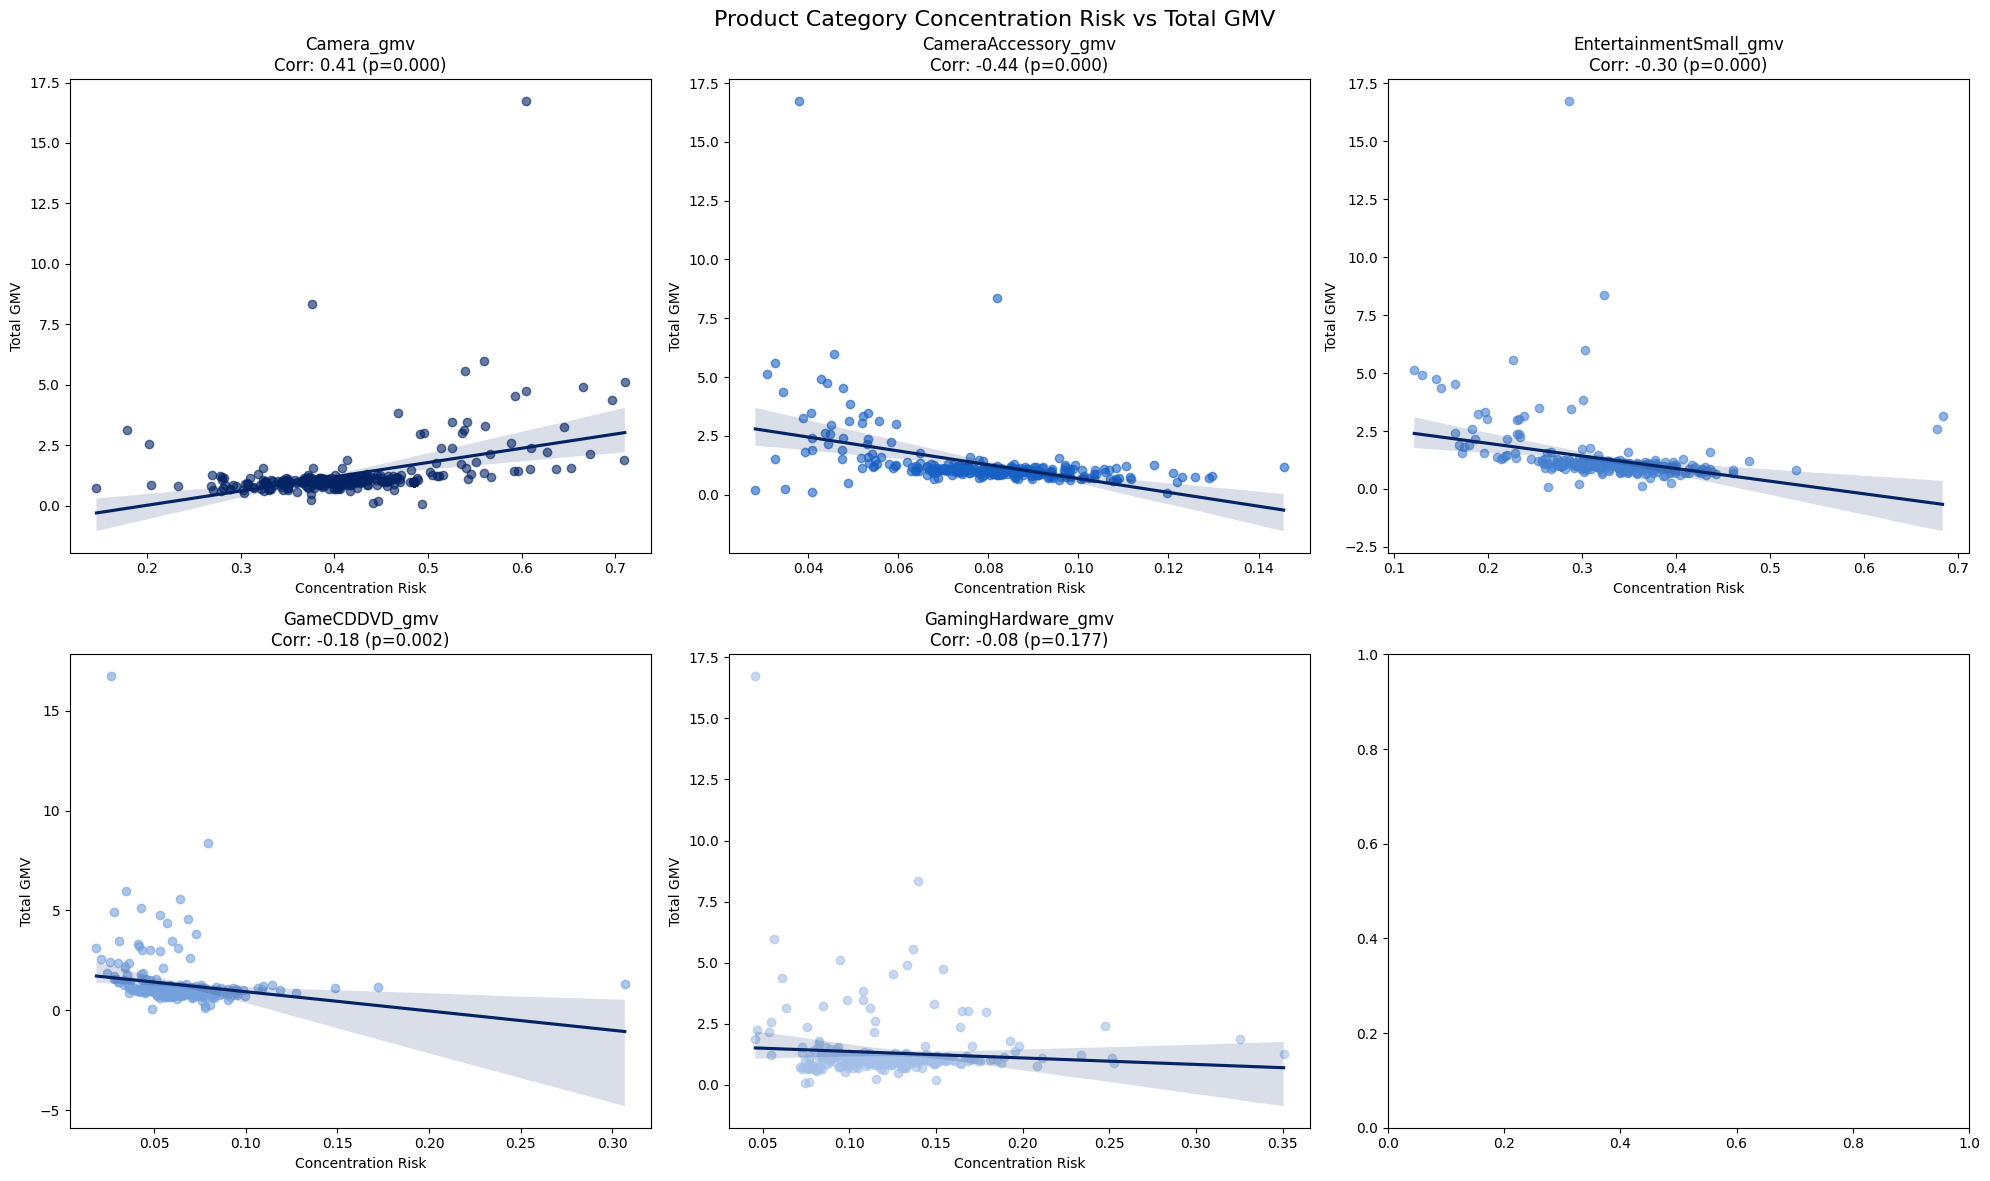

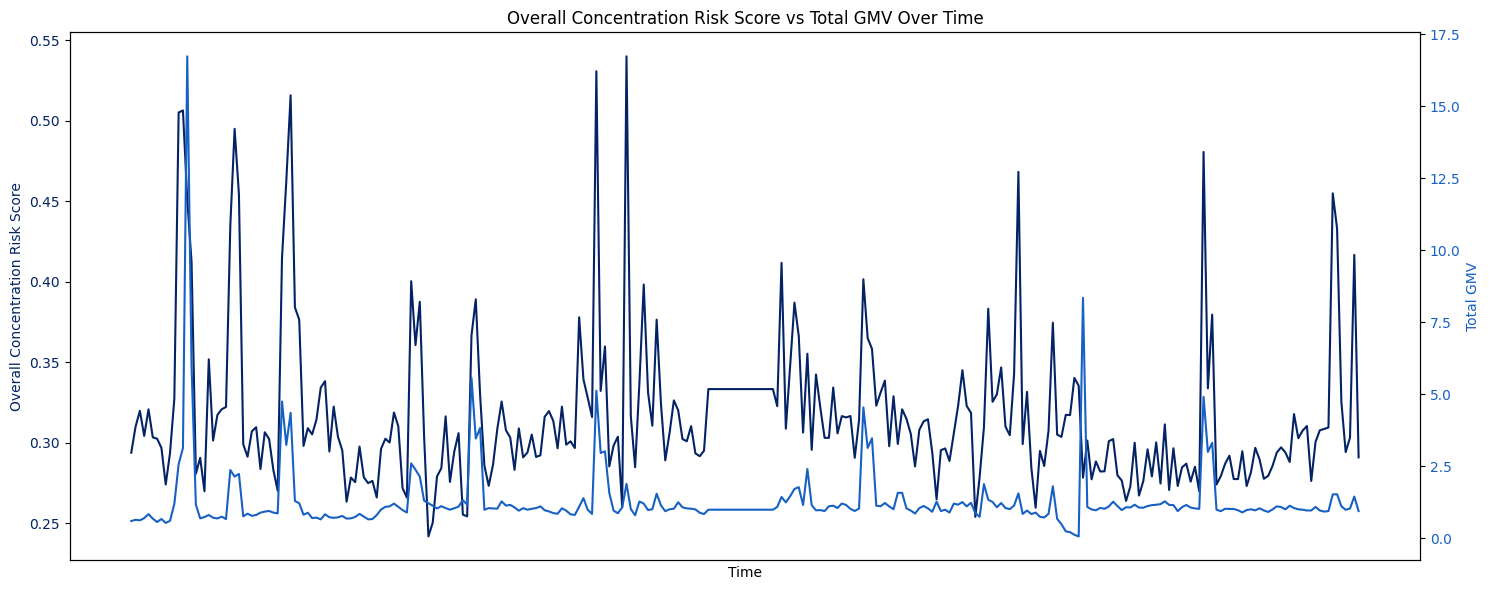

In [ ]:
custom_palette = ['#032365', '#1760C4', '#4580d0', '#74a0dc', '#a2bfe7', '#d1dff3']

def calculate_product_category_concentration_risk(df):
    """
    Calculates the product category concentration risk and analyzes its relationship with total GMV.

    Args:
        df: A Pandas DataFrame with product GMV columns and total_gmv

    Returns:
        A tuple containing:
        - Modified DataFrame with risk metrics
        - Dictionary with correlation results
    """
    # Define product GMV columns
    product_gmvs = ['Camera_gmv', 'CameraAccessory_gmv', 'EntertainmentSmall_gmv', 'GameCDDVD_gmv', 'GamingHardware_gmv']

    # Calculate total GMV
    df['Total GMV'] = df[product_gmvs].sum(axis=1)

    # Calculate concentration risk for each product category
    for product in product_gmvs:
        df[f'{product} Concentration Risk'] = df[product] / df['Total GMV']

    # Calculate overall concentration risk (Herfindahl-Hirschman Index)
    df['Overall Concentration Risk Score'] = sum((df[f'{product} Concentration Risk'] ** 2) for product in product_gmvs)

    # Analyze correlation with Total GMV
    correlation_results = {}
    for product in product_gmvs:
        correlation = stats.pearsonr(df[f'{product} Concentration Risk'], df['Total_GMV'])
        correlation_results[product] = {
            'correlation': correlation[0],
            'p_value': correlation[1]
        }

    return df, correlation_results

def plot_concentration_risk_analysis(df, correlation_results):
    """
    Creates visualizations for product category concentration risk analysis with a bluish and whitish color palette.
    """
    # 1. Heatmap of product category concentration risks over time
    # plt.figure(figsize=(15, 8))
    risk_columns = [col for col in df.columns if col.endswith('Concentration Risk') and col != 'Overall Concentration Risk Score']

    # Convert 'date' column to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)

    # 2. Concentration Risk vs GMV Scatter plots with regression lines
    product_gmvs = [col.replace(' Concentration Risk', '') for col in risk_columns]

    # Filter product_gmvs to include only those present in correlation_results
    product_gmvs = [product for product in product_gmvs if product in correlation_results]

    num_products = len(product_gmvs)
    num_cols = min(num_products, 3)  # Limit columns to 3
    num_rows = (num_products + num_cols - 1) // num_cols  # Calculate rows

    # Create a custom color palette from bluish and whitish colors
    scatter_palette = custom_palette[:num_products]

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))
    fig.suptitle('Product Category Concentration Risk vs Total GMV', fontsize=16)

    for idx, product in enumerate(product_gmvs):
        row = idx // num_cols
        col = idx % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]  # Handle single row case

        sns.regplot(data=df,
                   x=f'{product} Concentration Risk',
                   y='Total_GMV',
                   ax=ax,
                   scatter_kws={'alpha':0.6, 'color': scatter_palette[idx]},
                   line_kws={'color': '#032365'})  # Blue line for regression

        corr = correlation_results[product]['correlation']
        p_val = correlation_results[product]['p_value']

        ax.set_title(f'{product}\nCorr: {corr:.2f} (p={p_val:.3f})')
        ax.set_xlabel('Concentration Risk')
        ax.set_ylabel('Total GMV')

    plt.tight_layout()
    plt.show()

    # 3. Time series plot of Overall Concentration Risk Score and GMV
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # Plot Overall Concentration Risk Score with a bluish color
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Overall Concentration Risk Score', color='#032365')  # Dark blue color
    ax1.plot(df.index, df['Overall Concentration Risk Score'], color='#032365')
    ax1.tick_params(axis='y', labelcolor='#032365')

    # Plot GMV on secondary y-axis with a lighter blue color
    ax2 = ax1.twinx()
    ax2.set_ylabel('Total GMV', color='#1760C4')  # Lighter blue color
    ax2.plot(df.index, df['Total_GMV'], color='#1760C4')
    ax2.tick_params(axis='y', labelcolor='#1760C4')

    plt.title('Overall Concentration Risk Score vs Total GMV Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


df, correlation_results = calculate_product_category_concentration_risk(df)
plot_concentration_risk_analysis(df, correlation_results)

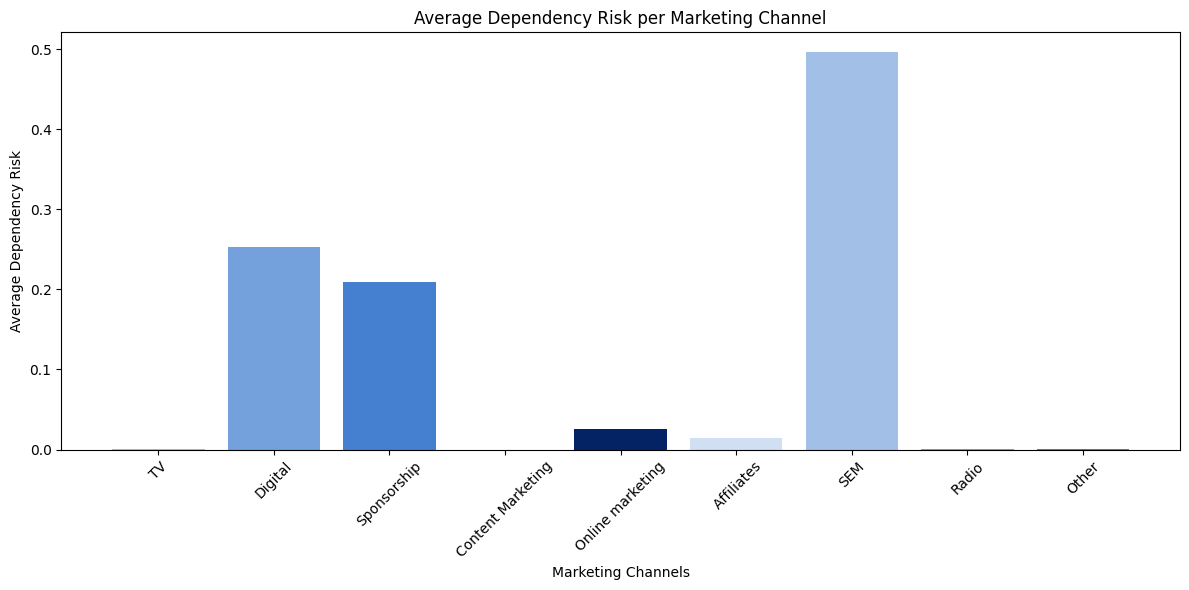

In [ ]:
def calculate_channel_dependency_risk(df):
    """
    Calculates the marketing channel dependency risk and analyzes its relationship with GMV.

    Args:
        df: A Pandas DataFrame with marketing channel investment columns and total_gmv

    Returns:
        A tuple containing:
        - Modified DataFrame with risk metrics
        - Dictionary with correlation results
    """
    # Define marketing channels
    marketing_channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing',
                         'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']

    # Calculate total investment
    df['Total Investment'] = df[marketing_channels].sum(axis=1)

    # Calculate dependency risk for each channel
    for channel in marketing_channels:
        df[f'{channel} Risk'] = df[channel] / df['Total Investment']

    # Calculate overall dependency risk (Herfindahl-Hirschman Index)
    df['Overall Risk Score'] = sum((df[f'{channel} Risk'] ** 2) for channel in marketing_channels)

    # Analyze correlation with GMV
    correlation_results = {}
    for channel in marketing_channels:
        correlation = stats.pearsonr(df[f'{channel} Risk'], df['Total_GMV'])
        correlation_results[channel] = {
            'correlation': correlation[0],
            'p_value': correlation[1]
        }

    return df, correlation_results

def plot_channelwise_dependency_risk(df):
    """
    Creates a bar plot for channel-wise dependency risk with a bluish and whitish color theme.
    """
    marketing_channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing',
                         'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']

    # Calculate average dependency risk for each channel
    avg_risks = {channel: df[f'{channel} Risk'].mean() for channel in marketing_channels}

    # Define a custom color palette with bluish and whitish tones
    custom_palette = ['#A2BFE7', '#74A0DC', '#4580D0', '#1760C4', '#032365', '#D1DFF3', '#A2BFE7', '#74A0DC', '#4580D0']

    # Create bar plot with the custom color palette
    plt.figure(figsize=(12, 6))
    plt.bar(avg_risks.keys(), avg_risks.values(), color=custom_palette)
    plt.xlabel('Marketing Channels')
    plt.ylabel('Average Dependency Risk')
    plt.title('Average Dependency Risk per Marketing Channel')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



df, correlation_results = calculate_channel_dependency_risk(df)
plot_channelwise_dependency_risk(df)

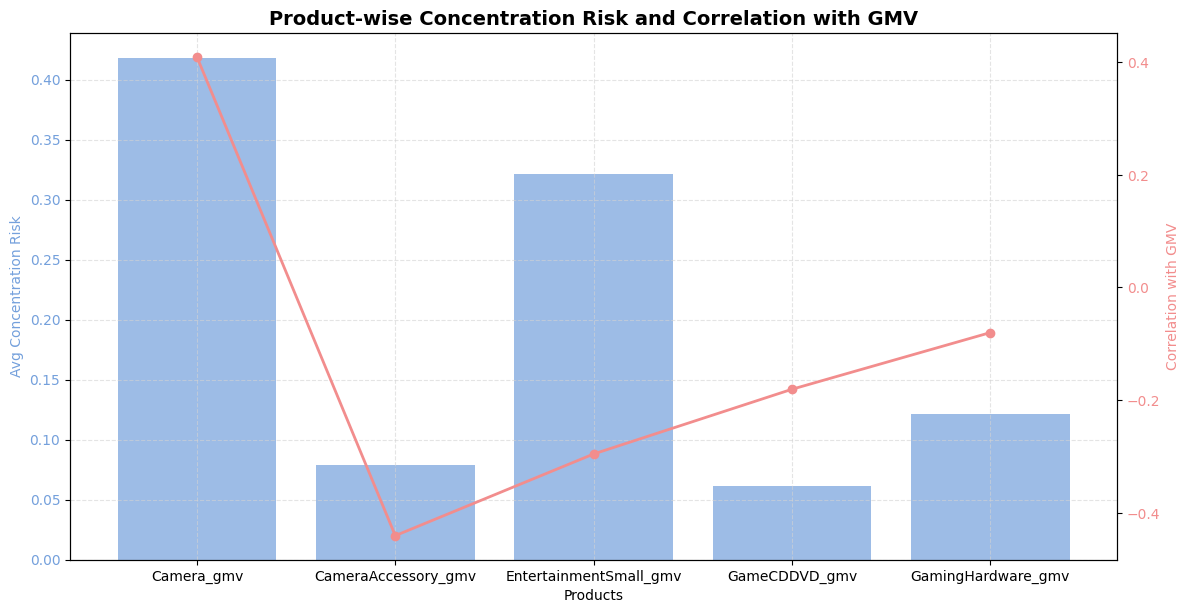

In [ ]:
def calculate_product_category_concentration_risk(df):
    """
    Calculates the product category concentration risk and analyzes its relationship with total GMV.

    Args:
        df: A Pandas DataFrame with product GMV columns and total_gmv

    Returns:
        A tuple containing:
        - Modified DataFrame with risk metrics
        - Dictionary with correlation results
    """
    product_gmvs = ['Camera_gmv', 'CameraAccessory_gmv', 'EntertainmentSmall_gmv', 'GameCDDVD_gmv', 'GamingHardware_gmv']

    # total GMV
    df['Total GMV'] = df[product_gmvs].sum(axis=1)

    # concentration risk for each product category
    for product in product_gmvs:
        df[f'{product} Concentration Risk'] = df[product] / df['Total GMV']

    # overall concentration risk (Herfindahl-Hirschman Index)
    df['Overall Concentration Risk Score'] = sum((df[f'{product} Concentration Risk'] ** 2) for product in product_gmvs)

    # correlation with Total GMV
    correlation_results = {}
    for product in product_gmvs:
        correlation = stats.pearsonr(df[f'{product} Concentration Risk'], df['Total_GMV'])
        correlation_results[product] = {
            'correlation': correlation[0],
            'p_value': correlation[1]
        }

    return df, correlation_results

def calculate_product_wise_risk(df):
    """
    Calculate average concentration risk and correlation with GMV for each product.
    """
    product_gmvs = ['Camera_gmv', 'CameraAccessory_gmv', 'EntertainmentSmall_gmv', 'GameCDDVD_gmv', 'GamingHardware_gmv']

    product_wise_risk = {}
    for product in product_gmvs:
        avg_risk = df[f'{product} Concentration Risk'].mean()
        correlation = stats.pearsonr(df[f'{product} Concentration Risk'], df['Total_GMV'])[0]
        product_wise_risk[product] = {
            'avg_risk': avg_risk,
            'correlation': correlation
        }

    return product_wise_risk

def plot_product_wise_risk(product_wise_risk):
    """
    Creates visualizations for product-wise concentration risk and correlation
    with a bluish and whitish color scheme.
    """
    products = list(product_wise_risk.keys())
    avg_risks = [product_wise_risk[product]['avg_risk'] for product in products]
    correlations = [product_wise_risk[product]['correlation'] for product in products]

    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.bar(products, avg_risks, color='#74A0DC', alpha=0.7, label='Avg Concentration Risk')
    ax1.set_xlabel('Products')
    ax1.set_ylabel('Avg Concentration Risk', color='#74A0DC')
    ax1.tick_params(axis='y', labelcolor='#74A0DC')

    ax2 = ax1.twinx()
    ax2.plot(products, correlations, color='#F28D8D', marker='o', linestyle='-', linewidth=2, label='Correlation with GMV')
    ax2.set_ylabel('Correlation with GMV', color='#F28D8D')
    ax2.tick_params(axis='y', labelcolor='#F28D8D')

    ax1.grid(True, linestyle='--', color='lightgray', alpha=0.6)

    fig.tight_layout()
    plt.title('Product-wise Concentration Risk and Correlation with GMV', fontsize=14, fontweight='bold')
    plt.show()

df, correlation_results = calculate_product_category_concentration_risk(df)
product_wise_risk = calculate_product_wise_risk(df)
plot_product_wise_risk(product_wise_risk)

The observed correlations between **channel dependency** and **product dependency** with **Gross Merchandise Value (GMV)** reveal important insights into the dynamics of marketing and sales performance.

### **Positive Correlation for Channel Dependency**  
A positive correlation indicates that as reliance on a particular **marketing channel** increases, the total **GMV also tends to rise**. This suggests that certain marketing channels play a crucial role in driving sales, and allocating more investment to these high-performing channels could further enhance overall revenue.

### **Negative Correlation for Product Dependency**  
Conversely, the negative correlation with **product dependency** implies that an increased reliance on specific **product categories** leads to a decline in total GMV. This could be attributed to factors such as **market saturation, lower demand, or reduced sales efficiency** when the focus is too narrow. Over-dependence on a limited range of products may restrict growth opportunities and limit overall revenue potential.

### **Key Implications**  

- **Optimizing Channel Strategy**: Given the positive correlation, the company should **prioritize investments** in marketing channels that demonstrate strong sales impact, ensuring that resources are directed toward the most effective platforms.  
- **Enhancing Product Diversification**: The negative correlation suggests a need for **broadening the product portfolio** to **mitigate risk and enhance revenue potential**. Diversification can help balance sales contributions across multiple categories, reducing over-reliance on specific products that may be underperforming.  

By leveraging these insights, the company can refine its marketing strategies and product offerings to drive sustainable growth and maximize GMV.

In [ ]:
def calculate_channel_dependency_risk(df):
    """
    Calculates the marketing channel dependency risk and analyzes its relationship with GMV.

    Args:
        df: A Pandas DataFrame with marketing channel investment columns and total_gmv

    Returns:
        A tuple containing:
        - Modified DataFrame with risk metrics
        - Dictionary with correlation results
    """
    # Define marketing channels
    marketing_channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing',
                         'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']

    # Calculate total investment
    df['Total Investment'] = df[marketing_channels].sum(axis=1)

    # Calculate dependency risk for each channel
    for channel in marketing_channels:
        df[f'{channel} Risk'] = df[channel] / df['Total Investment']

    # Calculate overall dependency risk (Herfindahl-Hirschman Index)
    df['Overall Risk Score'] = sum((df[f'{channel} Risk'] ** 2) for channel in marketing_channels)

    # Analyze correlation with GMV
    correlation_results = {}
    for channel in marketing_channels:
        correlation = stats.pearsonr(df[f'{channel} Risk'], df['Total_GMV'])
        correlation_results[channel] = {
            'correlation': correlation[0],
            'p_value': correlation[1]
        }

    return df, correlation_results

def calculate_bounds_based_on_risk_and_correlation(df, marketing_channels, correlation_results):
    """
    Calculate bounds for each marketing channel based on risk and correlation.
    """
    # Calculate baseline spend (current average spend)
    baseline_spend = {channel: df[channel].mean() for channel in marketing_channels}

    # Calculate bounds based on correlation and risk
    channel_bounds = {}
    for channel in marketing_channels:
        s_i = baseline_spend[channel]
        correlation = correlation_results[channel]['correlation']
        risk = df[f'{channel} Risk'].mean()

        if correlation > 0:
            # High positive correlation -> higher upper bound
            u_i = 1.5 * s_i
            l_i = 0.5 * s_i
        else:
            # Negative or low correlation -> lower upper bound
            u_i = 1.2 * s_i
            l_i = 0.3 * s_i

        if risk > 0.1:  # Example threshold for high dependency risk
            u_i = min(u_i, 1.3 * s_i)  # Limit upper bound for high-risk channels

        channel_bounds[channel] = (l_i, u_i)

    return baseline_spend, channel_bounds

marketing_channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']
df, correlation_results = calculate_channel_dependency_risk(df)
baseline_spend, channel_bounds = calculate_bounds_based_on_risk_and_correlation(df, marketing_channels, correlation_results)

print("Baseline Spend:", baseline_spend)
print("Channel Bounds:", channel_bounds)

Baseline Spend: {'TV': np.float64(0.021046665349539723), 'Digital': np.float64(46.07080712580804), 'Sponsorship': np.float64(37.99042892288458), 'Content Marketing': np.float64(7.11305515841907e-05), 'Online marketing': np.float64(4.805941089550283), ' Affiliates': np.float64(2.688485535641469), 'SEM': np.float64(90.51846307722883), 'Radio': np.float64(0.015975090418517076), 'Other': np.float64(0.16431492647384027)}
Channel Bounds: {'TV': (np.float64(0.010523332674769861), np.float64(0.031569998024309584)), 'Digital': (np.float64(13.821242137742411), np.float64(55.284968550969644)), 'Sponsorship': (np.float64(11.397128676865375), np.float64(45.5885147074615)), 'Content Marketing': (np.float64(3.556527579209535e-05), np.float64(0.00010669582737628605)), 'Online marketing': (np.float64(2.4029705447751417), np.float64(7.208911634325425)), ' Affiliates': (np.float64(1.3442427678207345), np.float64(4.0327283034622035)), 'SEM': (np.float64(27.15553892316865), np.float64(108.6221556926746)), 

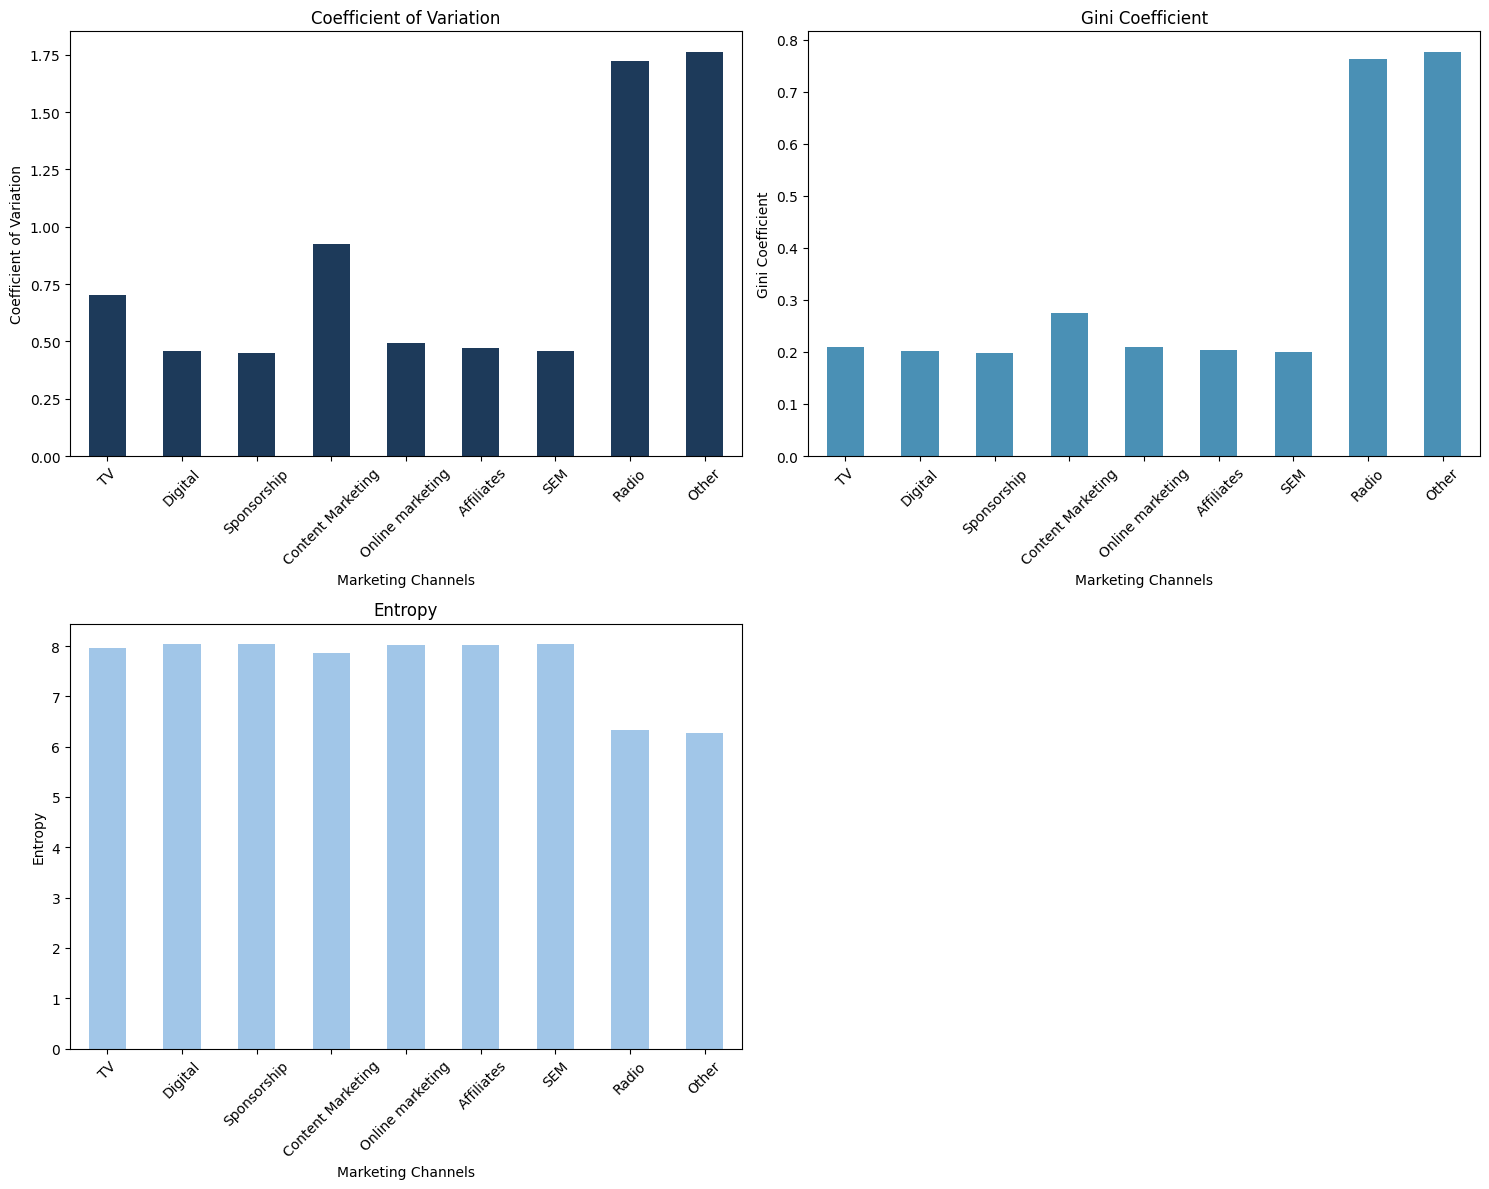

In [ ]:
def calculate_channel_dependency_risk(df):
    """
    Calculates the marketing channel dependency risk and analyzes its relationship with GMV.

    Args:
        df: A Pandas DataFrame with marketing channel investment columns and total_gmv

    Returns:
        A tuple containing:
        - Modified DataFrame with risk metrics
        - Dictionary with correlation results
    """
    # Define marketing channels
    marketing_channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing',
                         'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']

    # Calculate total investment
    df['Total Investment'] = df[marketing_channels].sum(axis=1)

    # Calculate dependency risk for each channel
    for channel in marketing_channels:
        df[f'{channel} Risk'] = df[channel] / df['Total Investment']

    # Calculate overall dependency risk (Herfindahl-Hirschman Index)
    df['Overall Risk Score'] = sum((df[f'{channel} Risk'] ** 2) for channel in marketing_channels)

    # Analyze correlation with GMV
    correlation_results = {}
    for channel in marketing_channels:
        correlation = stats.pearsonr(df[f'{channel} Risk'], df['Total_GMV'])
        correlation_results[channel] = {
            'correlation': correlation[0],
            'p_value': correlation[1]
        }

    return df, correlation_results

def calculate_gini_coefficient(array):
    """
    Calculate the Gini coefficient of a numpy array.
    """
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 0.0000001
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

def calculate_entropy(array):
    """
    Calculate the entropy of a numpy array.
    """
    array = array / np.sum(array)
    return -np.sum(array * np.log2(array + 0.0000001))

def calculate_advanced_metrics(df):
    """
    Calculate advanced risk metrics for marketing channels.
    """
    marketing_channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing',
                         'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']

    advanced_metrics = {}
    for channel in marketing_channels:
        avg_investment = df[channel].mean()
        std_dev_investment = df[channel].std()
        cv = std_dev_investment / avg_investment
        gini_coeff = calculate_gini_coefficient(df[channel].values)
        entropy = calculate_entropy(df[channel].values)

        advanced_metrics[channel] = {
            'Average Investment': avg_investment,
            'Standard Deviation': std_dev_investment,
            'Coefficient of Variation': cv,
            'Gini Coefficient': gini_coeff,
            'Entropy': entropy
        }

    return advanced_metrics

def plot_advanced_metrics(advanced_metrics):
    """
    Creates bar plots for advanced risk metrics using a dark blue to light blue color palette.
    """
    metrics_df = pd.DataFrame(advanced_metrics).T

    # Create bar plots with dark blue to light blue color palette
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Coefficient of Variation plot with a dark blue color
    metrics_df['Coefficient of Variation'].plot(kind='bar', ax=axes[0, 0], color='#1D3A5A')
    axes[0, 0].set_title('Coefficient of Variation')
    axes[0, 0].set_xlabel('Marketing Channels')
    axes[0, 0].set_ylabel('Coefficient of Variation')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Gini Coefficient plot with a medium blue color
    metrics_df['Gini Coefficient'].plot(kind='bar', ax=axes[0, 1], color='#4A90B5')
    axes[0, 1].set_title('Gini Coefficient')
    axes[0, 1].set_xlabel('Marketing Channels')
    axes[0, 1].set_ylabel('Gini Coefficient')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Entropy plot with a light blue color for contrast
    metrics_df['Entropy'].plot(kind='bar', ax=axes[1, 0], color='#A1C6E8')
    axes[1, 0].set_title('Entropy')
    axes[1, 0].set_xlabel('Marketing Channels')
    axes[1, 0].set_ylabel('Entropy')
    axes[1, 0].tick_params(axis='x', rotation=45)

    fig.delaxes(axes[1, 1])

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


df, correlation_results = calculate_channel_dependency_risk(df)
advanced_metrics = calculate_advanced_metrics(df)
plot_advanced_metrics(advanced_metrics)

### **Advanced Risk Metrics for Marketing Channel Analysis**  

1. **Herfindahl-Hirschman Index (HHI):**  
   - A measure of market concentration, used to assess the level of dependency on specific marketing channels.  
   - A higher HHI indicates greater reliance on a few channels, while a lower value suggests a more balanced allocation.  

2. **Gini Coefficient:**  
   - Evaluates the inequality in budget distribution across marketing channels.  
   - A higher Gini coefficient suggests that a few channels receive a disproportionate share of the investment, indicating potential inefficiencies in budget allocation.  

3. **Entropy:**  
   - Measures the randomness or diversification in marketing spend.  
   - Higher entropy values indicate a well-balanced and diversified marketing strategy, reducing over-reliance on specific channels and spreading risk effectively.  

4. **Risk-Adjusted Return on Investment (ROI):**  
   - Provides a refined understanding of each channel’s efficiency by adjusting ROI for risk factors such as volatility and uncertainty.  
   - Helps identify which channels generate the best returns relative to the risks involved.  

5. **Coefficient of Variation (CV):**  
   - Represents the relative variability in investment across different channels.  
   - Calculated as the ratio of standard deviation to the mean investment, it highlights the consistency of spending patterns. A high CV indicates erratic investment trends, whereas a low CV suggests stable and predictable allocation.  

### **Strategic Recommendations**

1. **Stabilize High-Variability Channels (Radio & Other):**  
   - **Issue:** Both channels show very high CV and Gini values, indicating erratic spending and over-reliance on a few campaigns or time periods.  
   - **Strategy:**  
     - **Reassess Budget Allocation:** Consider reducing extreme fluctuations by setting more consistent spending thresholds.  
     - **Diversification:** Broaden the distribution of investments across various campaigns to improve entropy and mitigate risk.

2. **Review Low-Investment Channels (Content Marketing):**  
   - **Issue:** While Content Marketing has a high CV relative to its minuscule average spend, the overall investment is extremely low.  
   - **Strategy:**  
     - **Increase Investment:** Evaluate the potential of scaling up investments if performance data supports higher returns.  
     - **Stabilize Spend:** Implement measures to reduce volatility as investment levels grow.

3. **Maintain Consistency in High-Performing Channels (Digital, Sponsorship, SEM):**  
   - **Observation:** These channels exhibit low CV, low Gini, and high entropy values, indicating stable, balanced, and diversified investments.  
   - **Strategy:**  
     - **Sustain Current Strategy:** Continue with the current investment approach while monitoring performance trends for any emerging risks.  
     - **Incremental Enhancements:** Consider slight optimizations to further boost performance without compromising consistency.

4. **Optimize Moderate Channels (TV, Online Marketing, Affiliates):**  
   - **Observation:** These channels maintain moderate CVs and equitable distributions.  
   - **Strategy:**  
     - **Fine-Tune Allocations:** Regularly review and adjust budgets to maintain stability and improve diversification.  
     - **Leverage Data:** Use performance metrics to identify opportunities for incremental improvements.

---

In [ ]:
# Define marketing channels
marketing_channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']

# Calculate GMV and Risk Score for each channel
gmv_risk_metrics = {}

for channel in marketing_channels:
    total_gmv = df['Total_GMV'].sum()
    total_investment = df[channel].sum()

    # Assuming GMV is proportional to the investment in each channel
    channel_gmv = (df[channel] / df[marketing_channels].sum(axis=1) * df['Total_GMV']).sum()

    risk_score = df[channel].std() / df[channel].mean()  # Coefficient of Variation as Risk Score

    gmv_risk_metrics[channel] = {
        'GMV': channel_gmv,
        'Risk Score': risk_score
    }

# Convert metrics to DataFrame for plotting
metrics_df = pd.DataFrame(gmv_risk_metrics).T

# Normalize the metrics
metrics_df['GMV'] = (metrics_df['GMV'] - metrics_df['GMV'].min()) / (metrics_df['GMV'].max() - metrics_df['GMV'].min())
metrics_df['Risk Score'] = (metrics_df['Risk Score'] - metrics_df['Risk Score'].min()) / (metrics_df['Risk Score'].max() - metrics_df['Risk Score'].min())

# Sort the DataFrame by Risk Score to ensure strictly increasing sequence
metrics_df = metrics_df.sort_values(by='Risk Score')



Enhanced Marketing Channel Bound Settings Analysis

Channel         GMV        Risk       Bound Type      Bounds          Flex Score     
Online marketing 0.06       0.04       Medium          0.50-1.50       43.48          
 Affiliates     0.03       0.02       Moderate        0.40-1.80       60.87          
Content Marketing 0.00       0.36       Tight           0.80-1.20       17.39          
TV              0.00       0.19       Tight           0.80-1.20       17.39          
Radio           0.00       0.97       Very Tight      0.90-1.10       8.70           
Other           0.00       1.00       Very Tight      0.90-1.10       8.70           
SEM             1.00       0.01       Very Wide       0.20-2.50       100.00         
Digital         0.51       0.01       Wide            0.21-2.21       87.16          
Sponsorship     0.42       0.00       Wide            0.22-2.19       85.65          


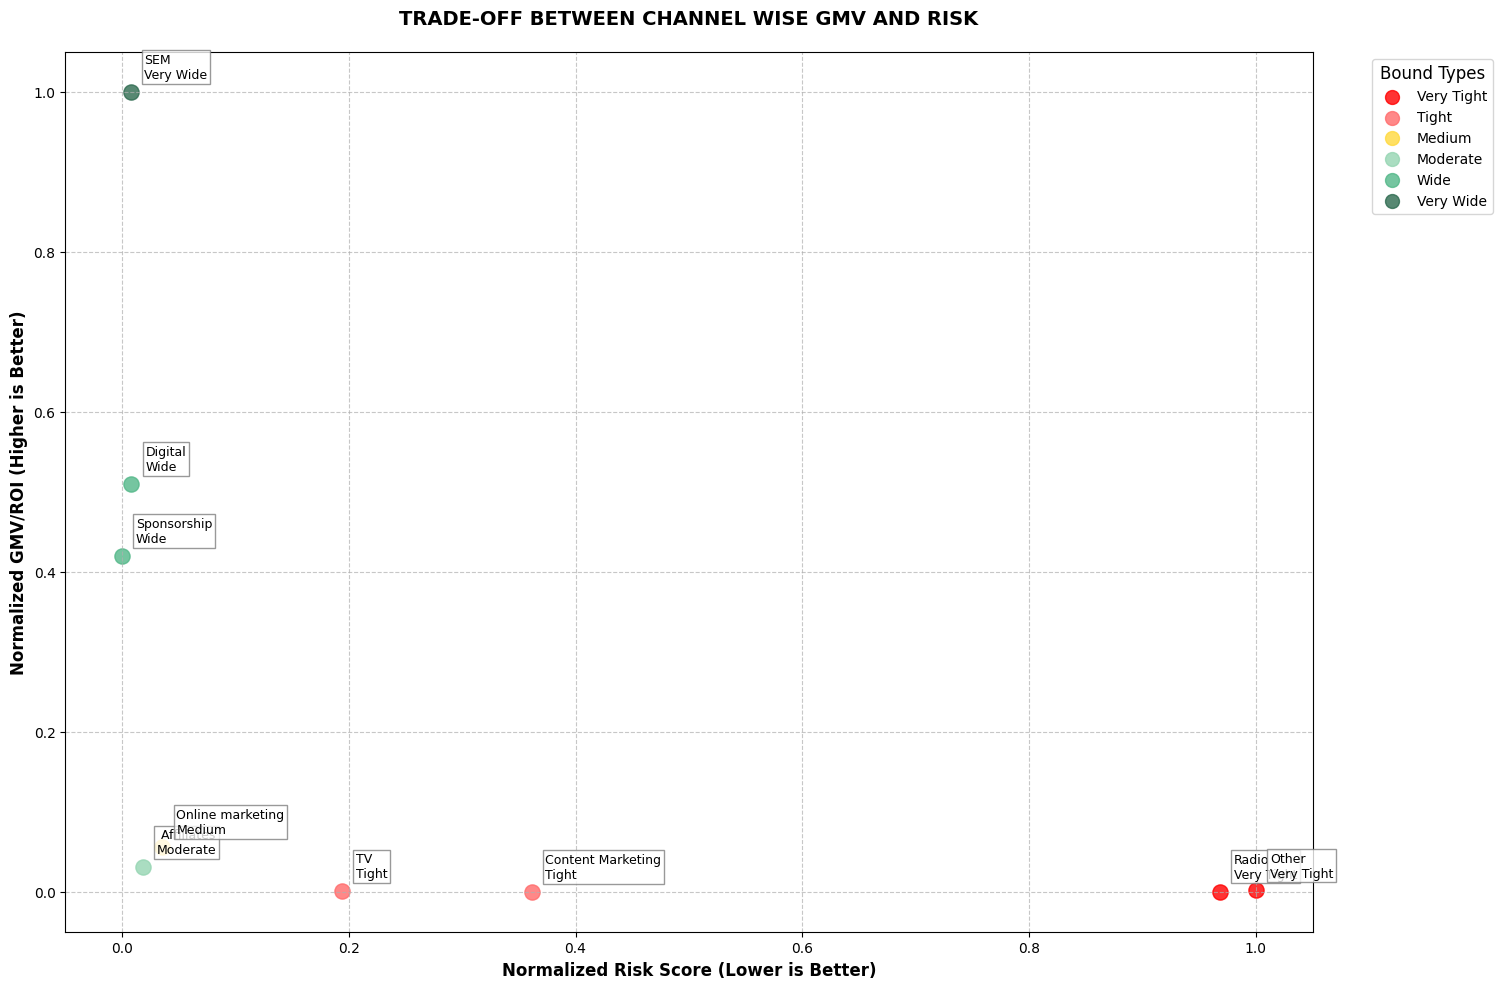

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def calculate_bound_settings(metrics_df):
    # Normalize the metrics first
    normalized_df = metrics_df

    # Calculate bounds and scores for each channel
    bound_settings = {}

    # Calculate quintiles for risk and GMV (using 5 categories instead of quartiles)
    risk_quintiles = normalized_df['Risk Score'].quantile([0.2, 0.4, 0.6, 0.8])
    gmv_quintiles = normalized_df['GMV'].quantile([0.2, 0.4, 0.6, 0.8])

    for channel in normalized_df.index:
        gmv = normalized_df.loc[channel, 'GMV']
        risk = normalized_df.loc[channel, 'Risk Score']

        # Dynamic bound calculation based on risk and GMV profiles
        risk_factor = (risk - normalized_df['Risk Score'].min()) / (normalized_df['Risk Score'].max() - normalized_df['Risk Score'].min())
        gmv_factor = (gmv - normalized_df['GMV'].min()) / (normalized_df['GMV'].max() - normalized_df['GMV'].min())

        # Calculate base bounds
        base_lower = 0.5
        base_upper = 1.5

        # Enhanced bound type determination
        if risk > risk_quintiles[0.8]:  # Very High Risk
            lower_bound = base_lower + 0.4
            upper_bound = base_upper - 0.5
            bound_type = "Very Tight"
        elif risk > risk_quintiles[0.6]:  # High Risk
            lower_bound = base_lower + 0.3
            upper_bound = base_upper - 0.3
            bound_type = "Tight"
        elif risk < risk_quintiles[0.2] and gmv > gmv_quintiles[0.8]:  # Very Low Risk, Very High GMV
            lower_bound = base_lower - 0.3
            upper_bound = base_upper + 0.8
            bound_type = "Very Wide"
        elif risk < risk_quintiles[0.4] and gmv > gmv_quintiles[0.6]:  # Low Risk, High GMV
            lower_bound = base_lower - 0.2
            upper_bound = base_upper + 0.6
            bound_type = "Wide"
        elif risk_quintiles[0.4] <= risk <= risk_quintiles[0.6]:  # Medium Risk
            lower_bound = base_lower
            upper_bound = base_upper
            bound_type = "Medium"
        else:
            lower_bound = base_lower - 0.1
            upper_bound = base_upper + 0.3
            bound_type = "Moderate"

        # Fine-tune bounds based on exact risk and GMV factors
        bound_adjustment = (1 - risk_factor) * gmv_factor * 0.15

        # Apply adjustments based on bound type
        if bound_type in ["Very Wide", "Wide"]:
            lower_bound -= bound_adjustment * 1.2
            upper_bound += bound_adjustment * 1.5
        elif bound_type in ["Very Tight", "Tight"]:
            lower_bound += bound_adjustment * 0.8
            upper_bound -= bound_adjustment * 0.8
        elif bound_type == "Medium":
            lower_bound += bound_adjustment * 0.2
            upper_bound += bound_adjustment * 0.2

        # Ensure bounds stay within reasonable limits with wider range
        lower_bound = max(0.2, min(0.9, lower_bound))
        upper_bound = max(1.1, min(2.5, upper_bound))

        # Calculate enhanced flexibility score
        flexibility_score = ((upper_bound - lower_bound) / 2.3) * 100

        bound_settings[channel] = {
            'normalized_gmv': gmv,
            'normalized_risk': risk,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'bound_type': bound_type,
            'flexibility_score': flexibility_score
        }

    return bound_settings

def display_bound_analysis(metrics_df):
    plt.figure(figsize=(15, 10))

    # Calculate bound settings
    bound_settings = calculate_bound_settings(metrics_df)

    # Enhanced color scheme for more categories
    colors = {
        'Very Tight': '#FF0000',    # Deep Red
        'Tight': '#FF6B6B',         # Light Red
        'Medium': '#FFD93D',        # Yellow
        'Moderate': '#95D5B2',      # Light Green
        'Wide': '#52B788',          # Medium Green
        'Very Wide': '#2D6A4F'      # Dark Green
    }

    # Create scatter plot with enhanced visualization
    for channel, settings in bound_settings.items():
        plt.scatter(settings['normalized_risk'], settings['normalized_gmv'],
                   c=colors[settings['bound_type']], s=120, alpha=0.8)

        # Enhanced label positioning and formatting
        plt.annotate(
            f"{channel}\n{settings['bound_type']}",
            (settings['normalized_risk'], settings['normalized_gmv']),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, pad=2),
            fontsize=9
        )

    # Enhanced plot styling
    plt.xlabel('Normalized Risk Score (Lower is Better)', fontsize=12, fontweight='bold')
    plt.ylabel('Normalized GMV/ROI (Higher is Better)', fontsize=12, fontweight='bold')
    plt.title(f'TRADE-OFF BETWEEN CHANNEL WISE GMV AND RISK',
             fontsize=14, pad=20, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Enhanced legend
    legend_elements = [plt.scatter([], [], c=color, label=bound_type, alpha=0.8, s=100)
                      for bound_type, color in colors.items()]
    plt.legend(handles=legend_elements, title="Bound Types",
              title_fontsize=12, fontsize=10,
              bbox_to_anchor=(1.15, 1))

    # Print detailed analysis with enhanced formatting
    print(f"\nEnhanced Marketing Channel Bound Settings Analysis")
    print("\n{:<15} {:<10} {:<10} {:<15} {:<15} {:<15}".format(
        "Channel", "GMV", "Risk", "Bound Type", "Bounds", "Flex Score"))
    print("=" * 80)

    sorted_channels = sorted(bound_settings.items(),
                           key=lambda x: (x[1]['bound_type'], -x[1]['flexibility_score']))

    for channel, settings in sorted_channels:
        print("{:<15} {:<10.2f} {:<10.2f} {:<15} {:<15} {:<15.2f}".format(
            channel,
            settings['normalized_gmv'],
            settings['normalized_risk'],
            settings['bound_type'],
            f"{settings['lower_bound']:.2f}-{settings['upper_bound']:.2f}",
            settings['flexibility_score']
        ))

    plt.tight_layout()
    plt.show()

    return bound_settings

bound_settings = display_bound_analysis(metrics_df)

The implemented approach for **constraint setting** integrates both **Key Performance Indicators (KPIs)** and **Key Risk Indicators (KRIs)** to establish dynamic marketing spend bounds across various channels. The method combines channel-level **Gross Merchandise Value (GMV)**, baseline investments, and the **coefficient of variation** (used to assess risk profiles) to calculate normalized metrics that ensure a fair comparison across different marketing channels.

The framework categorizes channels into five distinct **risk levels**—Very High, High, Medium, Low, and Very Low—based on the **normalized risk score**. Each risk category is associated with specific bounds as a percentage of the baseline spend, with channels at higher risk levels receiving tighter bounds to limit potential overspending. Conversely, channels with lower risk levels are assigned wider bounds, allowing more flexibility in allocation.

Additionally, the approach incorporates real-time **sales performance** to adjust the bounds. The code evaluates the most recent sales status with the following condition:
```python
is_good_sales = df['sale'].iloc[-1] == 1
```
This condition creates two distinct sets of bounds:
- **Normal Scenario (sales = 0):** Standard bounds are applied.
- **Good Sales Scenario (sales = 1):** The bounds are widened, with lower bounds reduced by 5% and upper bounds increased by 5%, reflecting the more favorable market conditions.

The enhanced summary output clearly distinguishes between the sales performance status, the corresponding bounds, and the risk categories with their respective ranges. This structure allows for a more adaptive budget allocation strategy that maintains proportionality to risk while leveraging strong sales performance to optimize budget flexibility.

In conclusion, this methodology ensures that marketing budget allocations are both **risk-sensitive** and **performance-driven**, offering increased agility in budget distribution during periods of positive sales performance. The dynamic adjustment of spend bounds allows for more aggressive budgeting when sales trends are favorable, while still adhering to risk management principles. This strategy ensures that spending remains proportionate to risk, maximizing the effectiveness of marketing investments.

In [ ]:
def calculate_supply_chain_efficiency(data):
    """
    Calculate supply chain efficiency metrics using delivery times and SLAs

    Parameters:
    data (DataFrame): DataFrame containing order data with deliverybdays, deliverycdays,
                     SLA, and product_procurement_SLA

    Returns:
    DataFrame: Original data with additional efficiency metrics
    dict: Summary of KRIs and KPIs
    """
    # Make a copy to avoid modifying the original dataframe
    df = data.copy()

    # Replace N values with 0 as mentioned in the case
    df['deliverybdays'] = df['deliverybdays'].replace('N', 0).astype(float)
    df['deliverycdays'] = df['deliverycdays'].replace('N', 0).astype(float)

    # Calculate efficiency metrics

    # 1. Delivery Performance
    df['actual_delivery_time'] = df['deliverybdays'] + df['deliverycdays']
    df['delivery_variance'] = df['actual_delivery_time'] - df['SLA']
    df['on_time_delivery'] = np.where(df['delivery_variance'] <= 0, 1, 0)

    # 2. Procurement Performance
    df['procurement_efficiency'] = df['deliverybdays'] / df['product_procurement_SLA']

    # 3. Overall Supply Chain Efficiency
    df['total_lead_time'] = df['deliverybdays'] + df['deliverycdays']
    df['expected_lead_time'] = df['SLA'] + df['product_procurement_SLA']
    df['lead_time_efficiency'] = df['expected_lead_time'] / df['total_lead_time']

    # 4. Risk Indicators
    df['delivery_risk'] = np.select(
        [df['delivery_variance'] <= -2, df['delivery_variance'] <= 0, df['delivery_variance'] <= 2, df['delivery_variance'] > 2],
        ['Low', 'Low', 'Medium', 'High'],
        default='High'
    )

    df['procurement_risk'] = np.select(
        [df['procurement_efficiency'] < 0.8, df['procurement_efficiency'] <= 1.2, df['procurement_efficiency'] > 1.2],
        ['High', 'Low', 'Medium'],
        default='Medium'
    )

    # Calculate KPIs and KRIs
    kpi_kri = {
        # KPIs
        'on_time_delivery_rate': df['on_time_delivery'].mean() * 100,
        'average_delivery_time': df['actual_delivery_time'].mean(),
        'average_lead_time': df['total_lead_time'].mean(),
        'lead_time_efficiency': df['lead_time_efficiency'].mean() * 100,

        # KRIs
        'late_delivery_percentage': (1 - df['on_time_delivery'].mean()) * 100,
        'extreme_delay_percentage': (df['delivery_variance'] > 3).mean() * 100,
        'high_risk_orders_percentage': (df['delivery_risk'] == 'High').mean() * 100,
        'procurement_delay_percentage': (df['procurement_risk'] == 'High').mean() * 100
    }

    return df, kpi_kri

def visualize_supply_chain_efficiency(df, kpi_kri):
    """
    Create visualizations for supply chain efficiency metrics

    Parameters:
    df (DataFrame): DataFrame with calculated efficiency metrics
    kpi_kri (dict): Dictionary containing KPI and KRI summary
    """
    # Set up the visualization style
    sns.set_style('whitegrid')
    plt.figure(figsize=(15, 10))

    # 1. On-Time Delivery Performance
    plt.subplot(2, 2, 1)
    labels = ['On-Time', 'Delayed']
    sizes = [kpi_kri['on_time_delivery_rate'], kpi_kri['late_delivery_percentage']]
    colors = ['#1760c3', '#d1dff3']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('On-Time Delivery Performance')

    # 2. Delivery Risk Distribution
    plt.subplot(2, 2, 2)
    risk_counts = df['delivery_risk'].value_counts()
    sns.barplot(x=risk_counts.index, y=risk_counts.values, palette=['#032365', '#1760C4', '#4580d0'])
    plt.title('Delivery Risk Distribution')
    plt.xlabel('Risk Level')
    plt.ylabel('Number of Orders')

    # 3. Lead Time Efficiency
    plt.subplot(2, 2, 3)
    plt.hist(df['lead_time_efficiency'], bins=20, color='#032365', alpha=0.7)
    plt.axvline(x=1, color='red', linestyle='--')
    plt.title('Lead Time Efficiency Distribution')
    plt.xlabel('Efficiency Ratio (Expected/Actual)')
    plt.ylabel('Frequency')

    # 4. KPI Dashboard
    plt.subplot(2, 2, 4)
    kpis = ['on_time_delivery_rate', 'lead_time_efficiency']
    values = [kpi_kri[kpi] for kpi in kpis]
    sns.barplot(x=values, y=['On-Time Delivery %', 'Lead Time Efficiency %'], palette=['#032365', '#74a0dc'])
    plt.title('Key Performance Indicators')
    plt.xlabel('Percentage (%)')

    plt.tight_layout()
    plt.show()

    # Create a KRI dashboard
    plt.figure(figsize=(12, 6))
    kris = ['late_delivery_percentage', 'extreme_delay_percentage',
            'high_risk_orders_percentage', 'procurement_delay_percentage']
    kri_names = ['Late Delivery', 'Extreme Delays', 'High Risk Orders', 'Procurement Delays']
    kri_values = [kpi_kri[kri] for kri in kris]



    # Create horizontal bar chart for KRIs
    bars = plt.barh(kri_names, kri_values, color=['#032365', '#1760c4', '#032365', '#74a0dc'])

    # Color code bars based on threshold
    for i, (bar, threshold) in enumerate(zip(bars, thresholds)):
        if kri_values[i] > threshold:
            bar.set_color('#d1dff3')

    plt.title('Supply Chain Key Risk Indicators (KRIs)')
    plt.xlabel('Percentage (%)')
    plt.tight_layout()
    plt.show()


KeyError: 'SLA'